# Linear Regression

### Libs import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/work/Personal_CG_Learning/REBELWAY/Intro_to_Machine_Learning/Source/Datasets/CarPrice_Assignment.csv")

### Data Studying (EDA)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Removing Object (Not Number) data

In [7]:
df.drop(df.select_dtypes(include=['object']).columns, axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

### Drop car_ID column

In [9]:
df.drop("car_ID", axis=1, inplace=True)

In [10]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Plotting

In [11]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

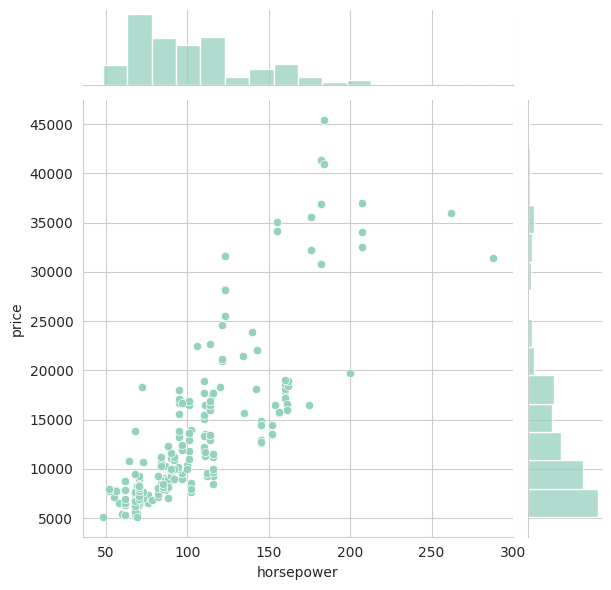

In [12]:
sns.jointplot(x="horsepower", y="price", data=df)

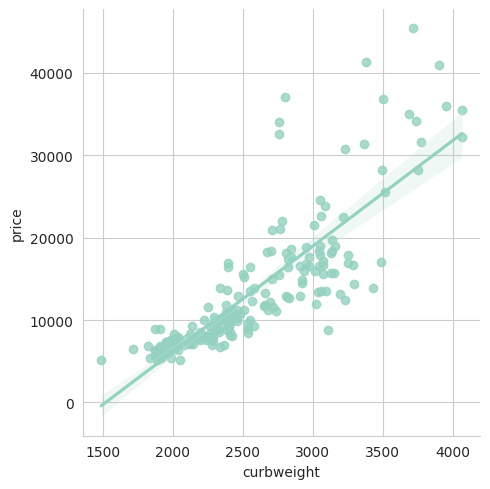

In [13]:
sns.lmplot(x="curbweight", y="price", data=df)

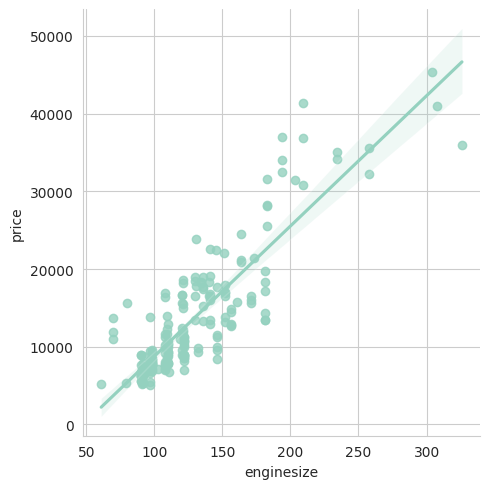

In [14]:
sns.lmplot(x="enginesize", y="price", data=df)

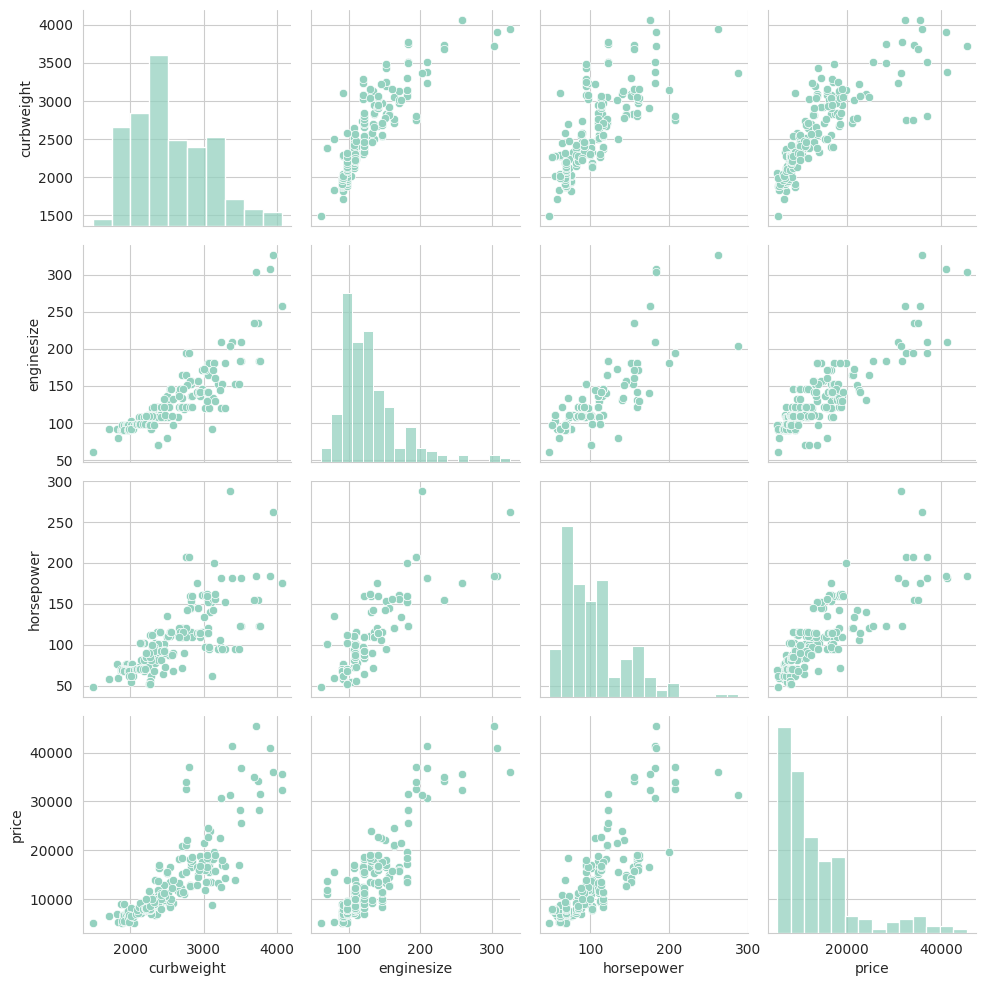

In [15]:
sns.pairplot(df, vars=("curbweight", "enginesize", "horsepower", "price"))

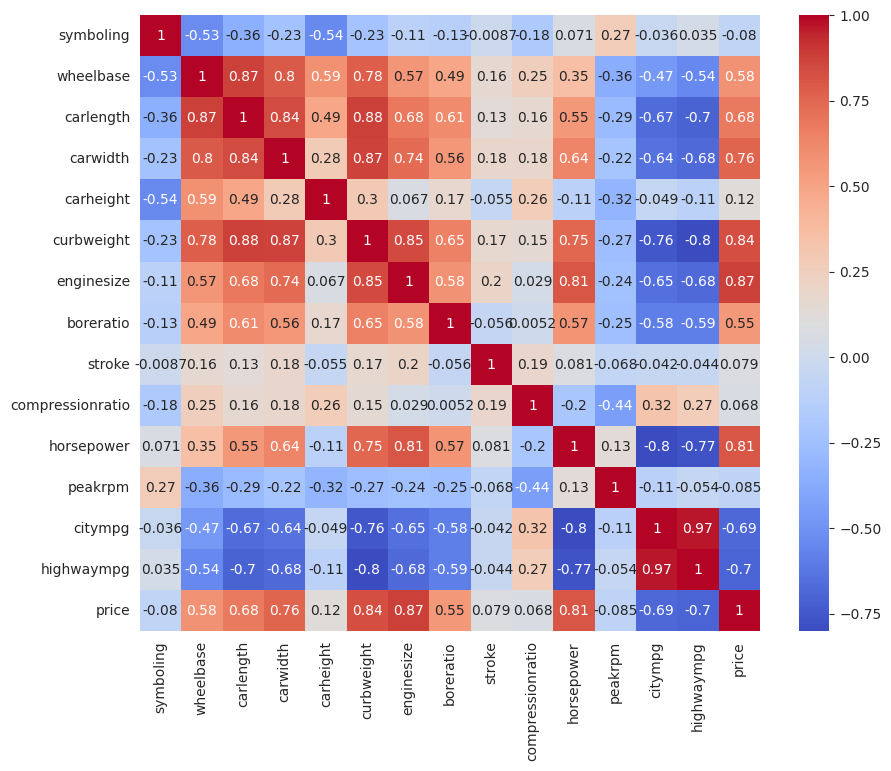

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [68]:
df2 = df[(df["price"]<30000)]

In [70]:
df2.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.836842,98.276316,172.811579,65.635263,53.755263,2480.031579,118.415789,3.303579,3.251263,10.183789,97.231579,5124.473684,25.947368,31.521053,11509.400879
std,1.230009,5.280965,11.375806,1.844961,2.425645,445.890595,26.854315,0.261671,0.304045,4.015859,30.225940,471.593591,6.212921,6.476419,4968.444389
min,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2128.000000,97.000000,3.130000,3.127500,8.700000,70.000000,4800.000000,21.000000,26.000000,7701.250000
50%,1.000000,96.500000,172.500000,65.400000,54.100000,2395.000000,110.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,25.000000,31.000000,9959.500000
75%,2.000000,100.400000,178.350000,66.500000,55.500000,2823.750000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,15197.500000
max,3.000000,114.200000,198.900000,71.400000,59.800000,3750.000000,183.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000


### Set global vars

In [27]:
X = df[["carlength", "carwidth", "carheight", "enginesize", "horsepower", "citympg", "highwaympg"]]
y = df["price"]

In [39]:
X = df[["curbweight", "enginesize", "horsepower"]]
y = df["price"]

### Create traning set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=195)

In [29]:
X_train

,carlength,carwidth,carheight,enginesize,horsepower,citympg,highwaympg
174,175.6,66.5,54.9,110,73,30,33
204,188.8,68.9,55.5,141,114,19,25
66,175.0,66.1,54.4,134,72,31,39
133,186.6,66.5,56.1,121,110,21,28
83,173.2,66.3,50.2,156,145,19,24
...,...,...,...,...,...,...,...
189,159.3,64.2,55.6,109,90,24,29
149,173.6,65.4,54.9,108,111,23,23
153,169.7,63.6,59.1,92,62,31,37
35,163.4,64.0,54.5,92,76,30,34


In [30]:
X_test

,carlength,carwidth,carheight,enginesize,horsepower,citympg,highwaympg
58,169.0,65.7,49.6,80,135,16,23
68,190.9,70.3,58.7,183,123,22,25
183,171.7,65.5,55.7,109,85,27,34
196,188.8,67.2,56.2,141,114,24,28
202,188.8,68.9,55.5,173,134,18,23
40,175.4,62.5,54.1,110,86,27,33
36,157.1,63.9,58.3,92,76,30,34
128,168.9,65.0,51.6,194,207,17,25
104,170.7,67.9,49.7,181,160,19,25
15,189.0,66.9,55.7,209,182,16,22


### Import Linear Regression model from SKLearn

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_mod = LinearRegression()

In [33]:
lin_mod.fit(X_train, y_train)

LinearRegression()

### Getting coefficients

In [34]:
print("Coefficients: ", lin_mod.coef_)

Coefficients:  [ -40.52215207 1039.58665874  173.15928841  102.10575906   52.40771935
  -62.93952498   75.49664238]


### Testing model

In [35]:
pred = lin_mod.predict(X_test)

### Comparing model's predictions to original Y values (ground truth)

Text(0, 0.5, 'Predicted Y')

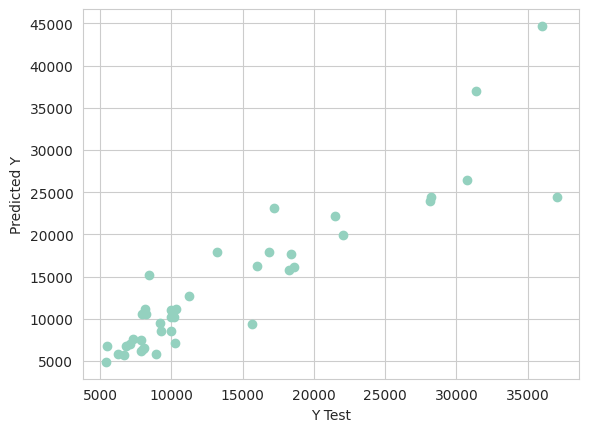

In [36]:
plt.scatter(y_test, pred)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

### Importing and using matrics for model training estimation

In [37]:
from sklearn import metrics

In [38]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error (MAE):  2485.247167635991
Mean Squared Error (MSE):  13071495.15884268
Root Mean Squared Error (RMSE):  3615.452275835304


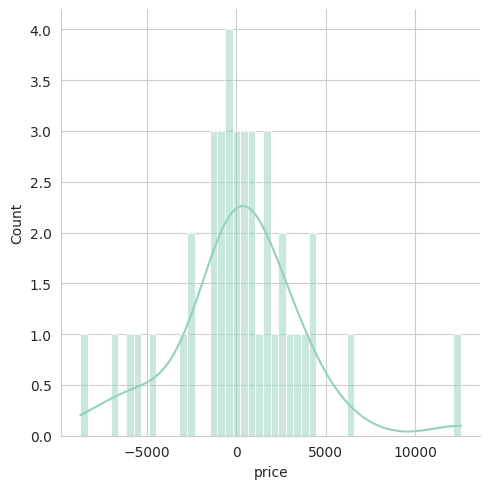

In [39]:
sns.displot((y_test - pred), bins=50, kde=True)